# Data Science
#### By: Javier Orduz
[license-badge]: https://img.shields.io/badge/License-CC-orange
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[![CC License][license-badge]][license]  [![DS](https://img.shields.io/badge/downloads-DS-green)](https://github.com/Earlham-College/DS_Fall_2022)  [![Github](https://img.shields.io/badge/jaorduz-repos-blue)](https://github.com/jaorduz/)  ![Follow @jaorduc](https://img.shields.io/twitter/follow/jaorduc?label=follow&logo=twitter&logoColor=lkj&style=plastic)


In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# GitLab\
https://github.com/tojacqu19/DS-401

# Exercises

1. Read `yelp.csv` into a DataFrame.
1. Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.
1. Define cool/useful/funny as the features, and stars as the response.
1. Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.
1. Submmit your report in Moodle. Template https://www.overleaf.com/read/xqcnnnrsspcp

<!--
1. Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?
6. Try removing some of the features and see if the RMSE improves.
7. **Bonus:** Think of some new features you could create from the existing data that might be predictive of the response. (This is called "feature engineering".) Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.
8. **Bonus:** Compare your best RMSE on testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean rating in the training set for all observations in the testing set.
9. **Bonus:** Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.
10. **Bonus:** Figure out how to use linear regression for classification, and compare its classification accuracy to KNN.
1. Submmit your report in Moodle. Template https://www.overleaf.com/read/xqcnnnrsspcp
-->

In [33]:
df = pd.read_csv("yelp.csv",encoding="ISO-8859-1")
df.drop('business_id', inplace = True,axis=1)
df.drop('review_id', inplace = True,axis=1)
df.drop('text', inplace = True,axis=1)
df.drop('type', inplace = True,axis=1)
df.drop('user_id', inplace = True,axis=1)
df.drop('date', inplace = True,axis=1)

df.head()


Index(['stars', 'cool', 'useful', 'funny'], dtype='object')


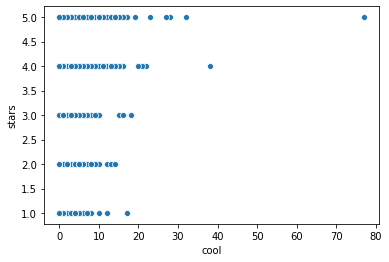

In [34]:
cool_star = sns.scatterplot(x = "cool", y = "stars", data = df)

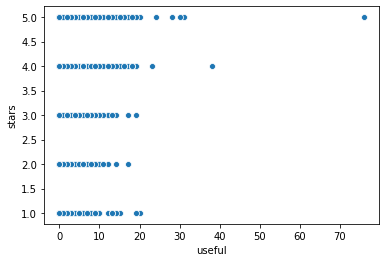

In [35]:
useful_star = sns.scatterplot(x = "useful", y = "stars", data = df)

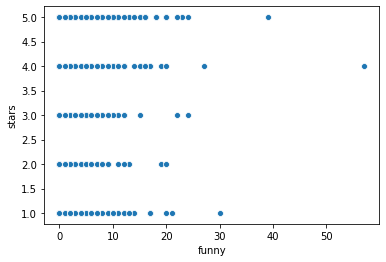

In [36]:
funny_star = sns.scatterplot(x = "funny", y = "stars", data = df)

In [46]:
#Define cool/useful/funny as the features, and stars as the response.
x = df.drop('stars',axis= 1)
y = df['stars']
print(x)
print(y)

##To do this part onwards, i made use of some online materials from GeekForGeeks

      cool  useful  funny
0        2       5      0
1        0       0      0
2        0       1      0
3        1       2      0
4        0       0      0
...    ...     ...    ...
9995     1       2      0
9996     0       0      0
9997     0       0      0
9998     0       0      0
9999     0       0      0

[10000 rows x 3 columns]
0       5
1       5
2       4
3       5
4       5
       ..
9995    3
9996    4
9997    4
9998    2
9999    5
Name: stars, Length: 10000, dtype: int64


In [41]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=101)


In [43]:
# creating a regression model
model = LinearRegression()

In [52]:
# fitting the model to the dataset
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients:  [ 0.26918374 -0.16597704 -0.12027986]
Variance score: 0.04389614158744726


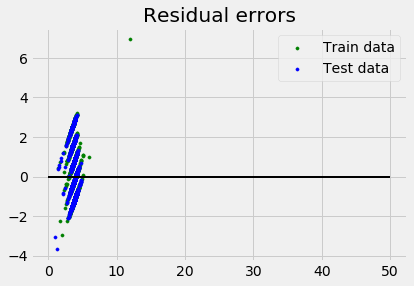

In [54]:
#i found this code from geekfromgeeks
# regression coefficients
print('Coefficients: ', model.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

From those coefficients, you would think that the coolness is the main driver of the stars, whereas usefulness and funniness would impact it negatively. It does not make much intuitive sense to me.

In [51]:
# making predictions from the model
predictions = model.predict(X_test)

In [50]:
#Evaluation the model
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.3941905401034225
mean_absolute_error :  0.9416369618140166


Those values are very low, which means that the model fits well to the data, although not perfect. 

## Versions

In [ ]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

# References

[0] data https://tinyurl.com/2m3vr2xp

[1] numpy https://numpy.org/

[2] scipy https://docs.scipy.org/

[3] matplotlib https://matplotlib.org/

[4] matplotlib.cm https://matplotlib.org/stable/api/cm_api.html

[5] matplotlib.pyplot https://matplotlib.org/stable/api/pyplot_summary.html

[6] pandas https://pandas.pydata.org/docs/

[7] seaborn https://seaborn.pydata.org/


In [4]:
df = pd.read_csv("yelp.csv", encoding = "latin1")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
